In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
import seaborn as sns

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("dataset/spambase_csv_Kaggle.csv")
print("Head \n", df.head())
print("Shape\n", df.shape)

Head 
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00      

In [4]:
print("Null Values\n", df.isnull().sum())
print("Describe\n", df.describe())

Null Values
 word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet           

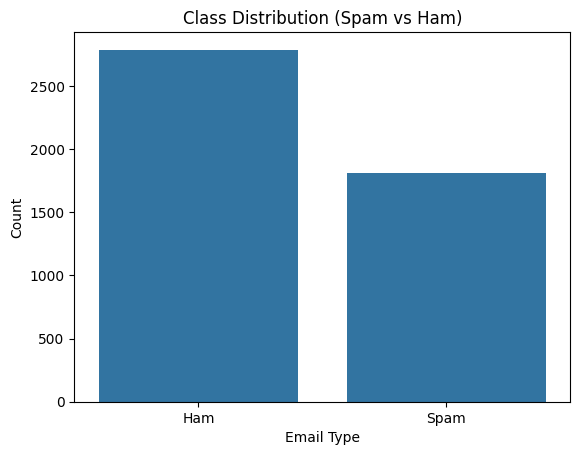

In [5]:
import matplotlib.pyplot as plt

sns.countplot(x="class", data=df)
plt.xticks([0, 1], ["Ham", "Spam"])
plt.title("Class Distribution (Spam vs Ham)")
plt.xlabel("Email Type")
plt.ylabel("Count")

plt.savefig("classDistribution.png",
            dpi=300,
            bbox_inches="tight")
plt.show()

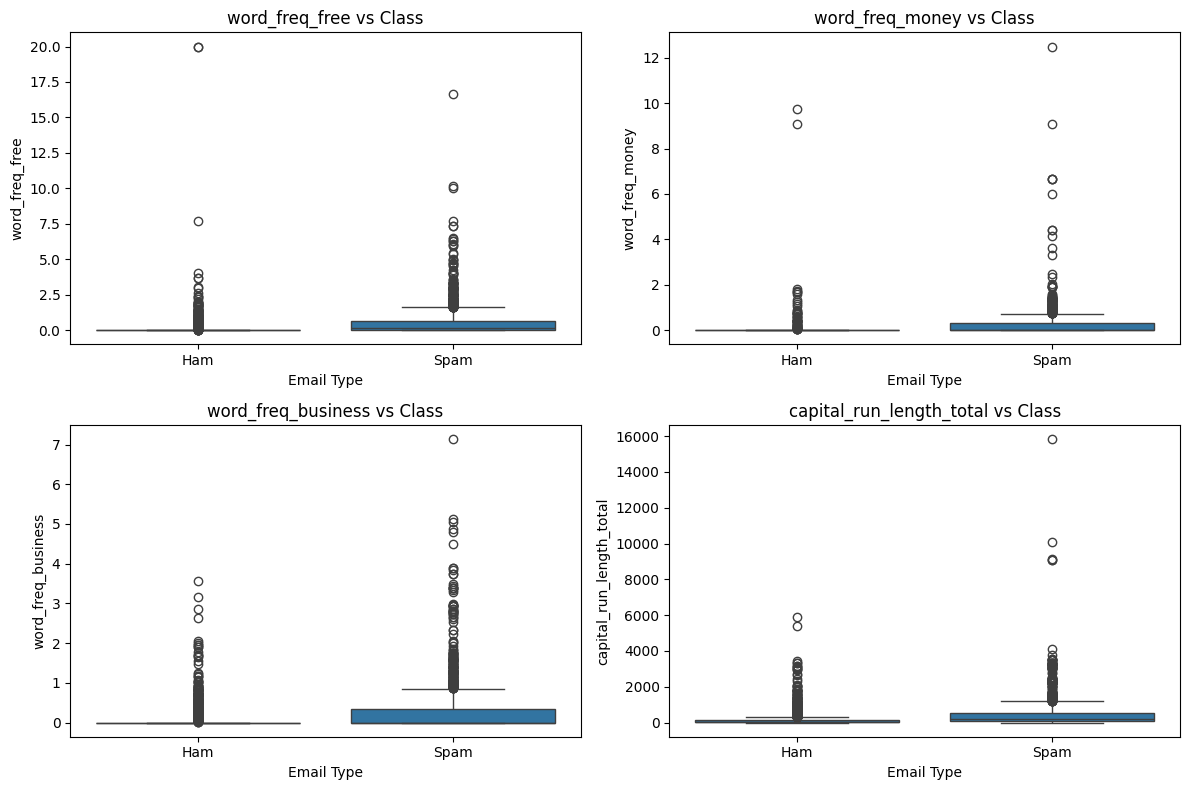

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    "word_freq_free",
    "word_freq_money",
    "word_freq_business",
    "capital_run_length_total"
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(
        x="class",
        y=feature,
        data=df,
        order=[0, 1],
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} vs Class")
    axes[i].set_xlabel("Email Type")
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(["Ham", "Spam"])

plt.tight_layout()
plt.savefig("boxPlotsImportantFeatures.png",
            dpi=300,
            bbox_inches="tight")

plt.show()

In [11]:
X = df.drop("class", axis = 1)
y = df["class"]

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y   
) # Train and Temp

In [13]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
) # Temp is splitted into validation and test

In [14]:
print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (3220, 57)
Validation size: (690, 57)
Test size: (691, 57)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [16]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

start = time.time()

lr_base = LogisticRegression(random_state=42)
lr_base.fit(X_train_scaled, y_train)

train_time_lr = time.time() - start

y_val_pred = lr_base.predict(X_val_scaled)

lr_metrics = {
    "Accuracy": accuracy_score(y_val, y_val_pred),
    "Precision": precision_score(y_val, y_val_pred),
    "Recall": recall_score(y_val, y_val_pred),
    "F1": f1_score(y_val, y_val_pred),
    "Training Time (s)": train_time_lr
}

lr_metrics

{'Accuracy': 0.9289855072463769,
 'Precision': 0.9054545454545454,
 'Recall': 0.9154411764705882,
 'F1': 0.9104204753199269,
 'Training Time (s)': 0.03601193428039551}

In [17]:
from sklearn.model_selection import RandomizedSearchCV

lr_param_dist = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

lr_random = RandomizedSearchCV(
    LogisticRegression(max_iter=5000),
    lr_param_dist,
    n_iter=8,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

lr_random.fit(X_train_scaled, y_train)

,estimator,LogisticRegre...max_iter=5000)
,param_distributions,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,n_iter,8
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [46]:
best_lr = lr_random.best_estimator_

y_val_pred = best_lr.predict(X_val_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy", accuracy_score(y_val, y_val_pred)) 
print("Precision Score",precision_score(y_val, y_val_pred)) 
print("Recall",recall_score(y_val, y_val_pred))
print("F1", f1_score(y_val, y_val_pred))

Accuracy 0.9304347826086956
Precision Score 0.9028776978417267
Recall 0.9227941176470589
F1 0.9127272727272727


In [49]:
lr_random.best_estimator_

,penalty,'l1'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,5000
,multi_class,'deprecated'


In [19]:
from sklearn.svm import SVC

kernels = ["linear", "poly", "rbf", "sigmoid"]

svm_kernel_results = {}

svm_kernel_models = {}

for k in kernels:
    start = time.time()

    svm = SVC(kernel=k)
    svm.fit(X_train_scaled, y_train)

    train_time = time.time() - start

    preds = svm.predict(X_val_scaled)

    svm_kernel_results[k] = {
        "Accuracy": accuracy_score(y_val, preds),
        "F1": f1_score(y_val, preds),
        "Training Time (s)": train_time
    }
    
    svm_kernel_models[k] = svm

svm_kernel_results

{'linear': {'Accuracy': 0.9304347826086956,
  'F1': 0.9130434782608695,
  'Training Time (s)': 0.4328904151916504},
 'poly': {'Accuracy': 0.7710144927536232,
  'F1': 0.6089108910891089,
  'Training Time (s)': 0.4179704189300537},
 'rbf': {'Accuracy': 0.9347826086956522,
  'F1': 0.9168207024029574,
  'Training Time (s)': 0.2859964370727539},
 'sigmoid': {'Accuracy': 0.8913043478260869,
  'F1': 0.864376130198915,
  'Training Time (s)': 0.26297926902770996}}

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

svm_param_dist = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto"],
    "degree": [2, 3, 4]
}

svm_random = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=svm_param_dist,
    n_iter=20,          # try 20 random combos
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

svm_random.fit(X_train_scaled, y_train)

svm_random.best_params_, svm_random.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 1}, 0.9307453416149067)

In [21]:
best_lr = lr_random.best_estimator_
best_svm = svm_random.best_estimator_

# Logistic Regression
lr_test_preds = best_lr.predict(X_test_scaled)

# SVM
svm_test_preds = best_svm.predict(X_test_scaled)

from sklearn.metrics import classification_report

print("LOGISTIC REGRESSION TEST\n", classification_report(y_test, lr_test_preds))
print("SVM TEST\n", classification_report(y_test, svm_test_preds))

LOGISTIC REGRESSION TEST
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       419
           1       0.94      0.87      0.90       272

    accuracy                           0.93       691
   macro avg       0.93      0.92      0.92       691
weighted avg       0.93      0.93      0.93       691

SVM TEST
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       419
           1       0.93      0.86      0.90       272

    accuracy                           0.92       691
   macro avg       0.92      0.91      0.92       691
weighted avg       0.92      0.92      0.92       691



In [22]:
from sklearn.model_selection import cross_val_score

lr_cv = cross_val_score(best_lr, X_train_scaled, y_train, cv=5)
svm_cv = cross_val_score(best_svm, X_train_scaled, y_train, cv=5)

lr_cv, svm_cv

(array([0.91614907, 0.92857143, 0.92701863, 0.92391304, 0.93167702]),
 array([0.92080745, 0.94254658, 0.92080745, 0.93478261, 0.93478261]))

In [23]:
import numpy as np

for i in range(5):
    print(f"Fold {i+1}: LR={lr_cv[i]:.4f}  SVM={svm_cv[i]:.4f}")

print("Average LR:", lr_cv.mean())
print("Average SVM:", svm_cv.mean())

Fold 1: LR=0.9161  SVM=0.9208
Fold 2: LR=0.9286  SVM=0.9425
Fold 3: LR=0.9270  SVM=0.9208
Fold 4: LR=0.9239  SVM=0.9348
Fold 5: LR=0.9317  SVM=0.9348
Average LR: 0.9254658385093167
Average SVM: 0.9307453416149067


In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_and_save_confusion_matrix(
    y_true,
    y_pred,
    filename,
    title=None,
    dpi=300
):
    """
    Plots and saves a confusion matrix.

    Parameters:
    - y_true: Ground truth labels
    - y_pred: Predicted labels
    - filename: Output image filename (e.g., 'cm_svm.png')
    - title: Optional plot title
    - dpi: Image resolution (default=300)
    """

    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

    if title:
        plt.title(title)

    plt.tight_layout()
    plt.savefig(filename, dpi=dpi)
    plt.show()

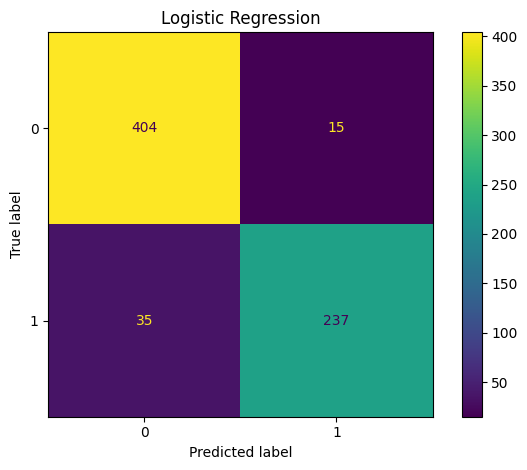

In [42]:
y_test_pred_lr = lr_base.predict(X_test_scaled)

plot_and_save_confusion_matrix(
    y_test,
    y_test_pred_lr,
    filename="cm_logistic_normal_test.png",
    title="Logistic Regression"
)

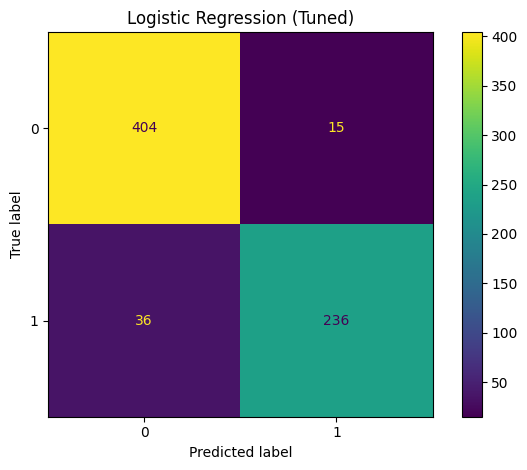

In [41]:
y_test_pred_lr = best_lr.predict(X_test_scaled)

plot_and_save_confusion_matrix(
    y_test,
    y_test_pred_lr,
    filename="cm_logistic_test.png",
    title="Logistic Regression (Tuned)"
)

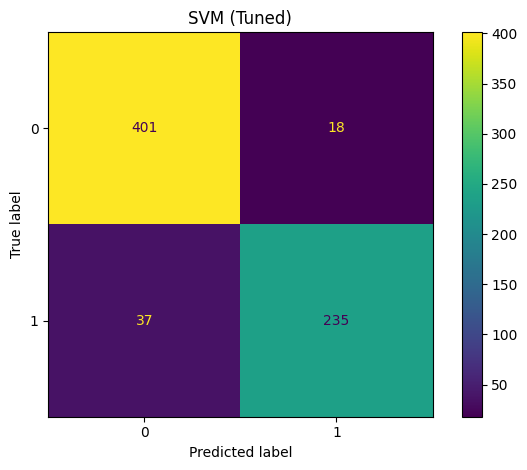

In [38]:
y_test_pred_svm = svm_random.best_estimator_.predict(X_test_scaled)

plot_and_save_confusion_matrix(
    y_test,
    y_test_pred_svm,
    filename="cm_svm_test.png",
    title="SVM (Tuned)"
)

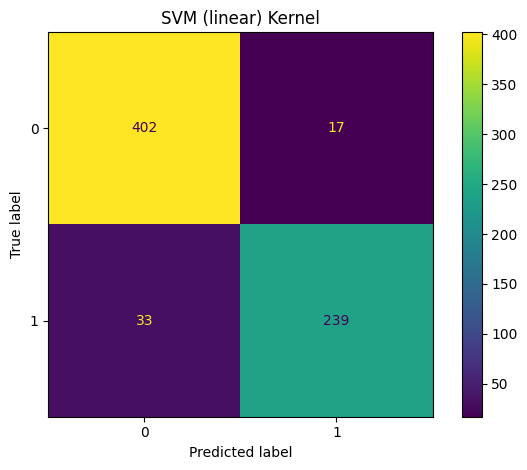

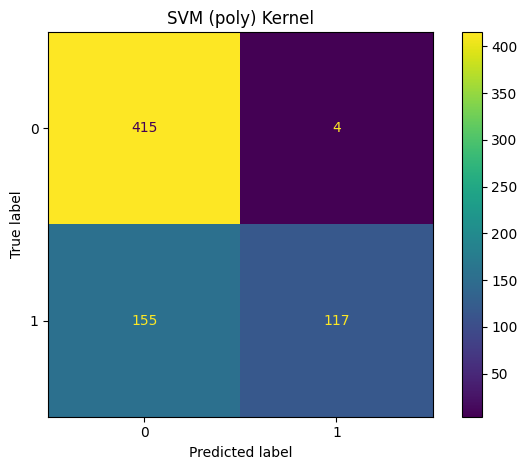

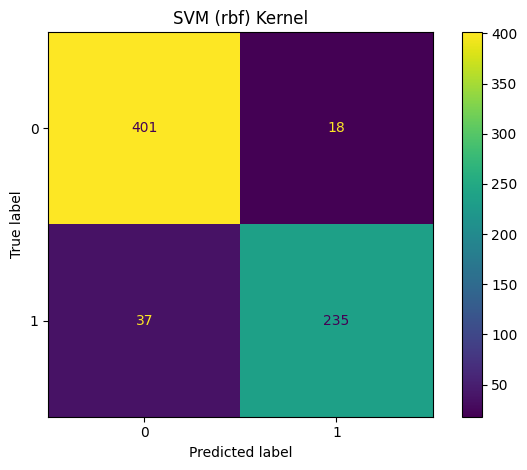

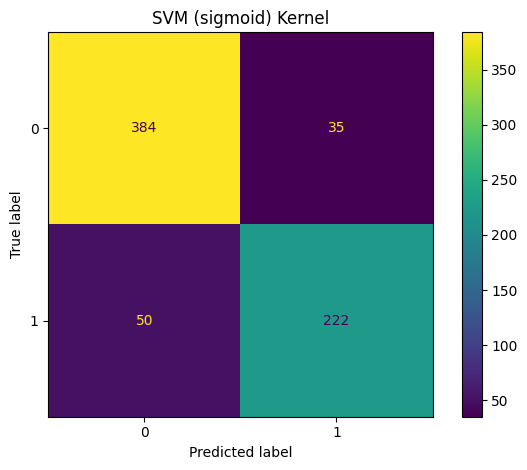

In [39]:
for kernel, model in svm_kernel_models.items():

    preds = model.predict(X_test_scaled)

    plot_and_save_confusion_matrix(
        y_test,
        preds,
        filename=f"cm_svm_{kernel}.png",
        title=f"SVM ({kernel}) Kernel"
    )

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_multi_roc(
    y_true,
    model_scores_dict,
    filename,
    title="ROC Curves",
    dpi=300
):
    """
    model_scores_dict = {
        "Model Name": score_array,
        ...
    }
    """

    plt.figure()

    for name, scores in model_scores_dict.items():
        fpr, tpr, _ = roc_curve(y_true, scores)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], linestyle="--", label="Random")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.savefig(filename, dpi=dpi)
    plt.show()

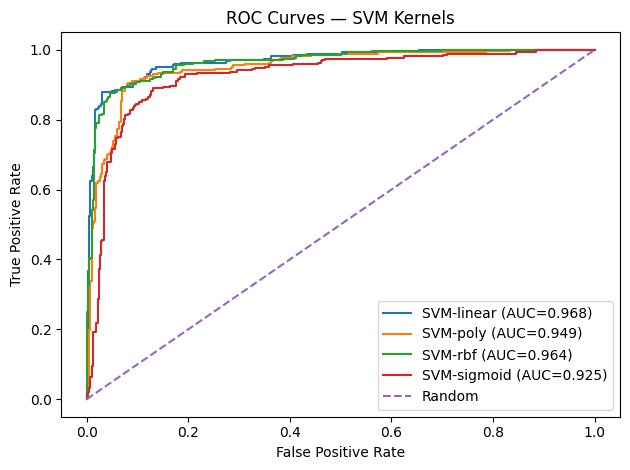

In [29]:
svm_kernel_scores = {}

for kernel, model in svm_kernel_models.items():

    # decision scores
    scores = model.decision_function(X_test_scaled)

    svm_kernel_scores[f"SVM-{kernel}"] = scores


plot_multi_roc(
    y_test,
    svm_kernel_scores,
    filename="roc_svm_all_kernels.png",
    title="ROC Curves — SVM Kernels"
)

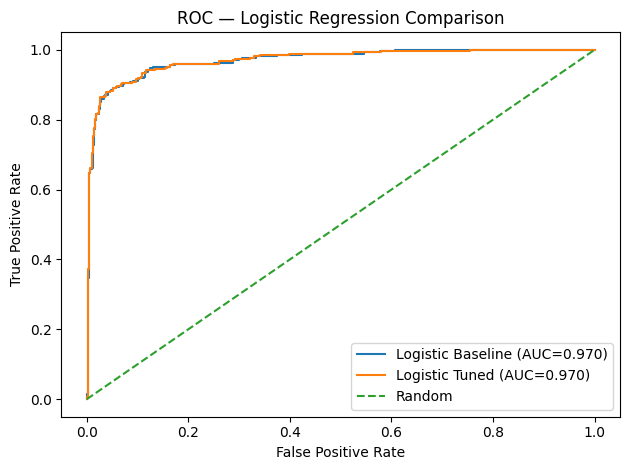

In [30]:
lr_baseline_scores = lr_base.predict_proba(X_test_scaled)[:, 1]
lr_best_scores = best_lr.predict_proba(X_test_scaled)[:, 1]

plot_multi_roc(
    y_test,
    {
        "Logistic Baseline": lr_baseline_scores,
        "Logistic Tuned": lr_best_scores
    },
    filename="roc_logistic_baseline_vs_tuned.png",
    title="ROC — Logistic Regression Comparison"
)

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(
    estimator,
    X,
    y,
    filename,
    title="Learning Curve",
    cv=5,
    scoring="accuracy",
    dpi=300
):
    """
    Plots and saves learning curve (train & validation accuracy).
    """

    train_sizes, train_scores, val_scores = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 6),
        n_jobs=-1
    )

    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.figure()

    plt.plot(train_sizes, train_mean, marker="o", label="Training Accuracy")
    plt.plot(train_sizes, val_mean, marker="o", label="Validation Accuracy")

    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()

    plt.tight_layout()
    plt.savefig(filename, dpi=dpi)
    plt.show()

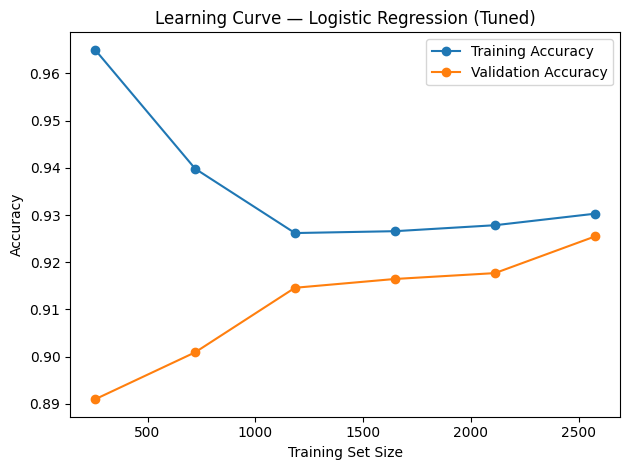

In [35]:
plot_learning_curve(
    best_lr,
    X_train_scaled,
    y_train,
    filename="learning_curve_logistic.png",
    title="Learning Curve — Logistic Regression (Tuned)"
)

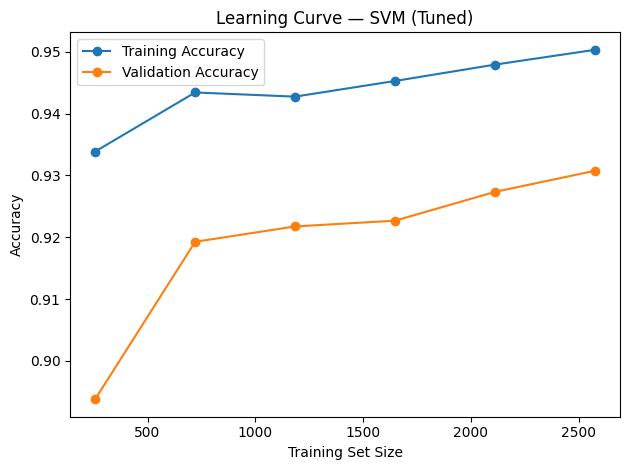

In [36]:
plot_learning_curve(
    svm_random.best_estimator_,
    X_train_scaled,
    y_train,
    filename="learning_curve_svm.png",
    title="Learning Curve — SVM (Tuned)"
)